In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# New Section

In [115]:
df = pd.read_csv('/content/sample_data/Housing.csv')

In [116]:
df.tail(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
535,2100000,3360,2,1,1,yes,no,no,no,no,1,no,unfurnished
536,1960000,3420,5,1,2,no,no,no,no,no,0,no,unfurnished
537,1890000,1700,3,1,2,yes,no,no,no,no,0,no,unfurnished
538,1890000,3649,2,1,1,yes,no,no,no,no,0,no,unfurnished
539,1855000,2990,2,1,1,no,no,no,no,no,1,no,unfurnished
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [117]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [119]:
list1 = ['mainroad', 'guestroom','basement','hotwaterheating','airconditioning','prefarea']

In [120]:
df[list1] = df[list1].replace({'yes':1,'no':2})

<ipython-input-120-be42f99a6e78>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[list1] = df[list1].replace({'yes':1,'no':2})


In [121]:
df[list1]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,2,2,2,1,1
1,1,2,2,2,1,2
2,1,2,1,2,2,1
3,1,2,1,2,1,1
4,1,1,1,2,1,2
...,...,...,...,...,...,...
540,1,2,1,2,2,2
541,2,2,2,2,2,2
542,1,2,2,2,2,2
543,2,2,2,2,2,2


In [122]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,1,2,1,2,2,2,2,unfurnished
541,1767150,2400,3,1,1,2,2,2,2,2,0,2,semi-furnished
542,1750000,3620,2,1,1,1,2,2,2,2,0,2,unfurnished
543,1750000,2910,3,1,1,2,2,2,2,2,0,2,furnished
544,1750000,3850,3,1,2,1,2,2,2,2,0,2,unfurnished


In [123]:
df['furnishingstatus'] = df['furnishingstatus'].replace({'furnished':1,'semi-furnished':2,'unfurnished':3})

<ipython-input-123-5e4537cddea1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['furnishingstatus'] = df['furnishingstatus'].replace({'furnished':1,'semi-furnished':2,'unfurnished':3})


In [124]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,1,2,1,2,2,2,2,3
541,1767150,2400,3,1,1,2,2,2,2,2,0,2,2
542,1750000,3620,2,1,1,1,2,2,2,2,0,2,3
543,1750000,2910,3,1,1,2,2,2,2,2,0,2,1
544,1750000,3850,3,1,2,1,2,2,2,2,0,2,3


In [125]:
list2 = ['price','area']

In [126]:
scaler = StandardScaler()

In [127]:
df[list2] = scaler.fit_transform(df[list2])

In [128]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,4,2,3,1,2,2,2,1,2,1,1
1,4.004484,1.757010,4,4,4,1,2,2,2,1,3,2,1
2,4.004484,2.218232,3,2,2,1,2,1,2,2,2,1,2
3,3.985755,1.083624,4,2,2,1,2,1,2,1,3,1,1
4,3.554979,1.046726,4,1,2,1,1,1,2,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.576868,-0.991879,2,1,1,1,2,1,2,2,2,2,3
541,-1.605149,-1.268613,3,1,1,2,2,2,2,2,0,2,2
542,-1.614327,-0.705921,2,1,1,1,2,2,2,2,0,2,3
543,-1.614327,-1.033389,3,1,1,2,2,2,2,2,0,2,1


In [129]:
core = df.corr()

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    float64
 1   area              545 non-null    float64
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    int64  
 6   guestroom         545 non-null    int64  
 7   basement          545 non-null    int64  
 8   hotwaterheating   545 non-null    int64  
 9   airconditioning   545 non-null    int64  
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    int64  
 12  furnishingstatus  545 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 55.5 KB


In [131]:
core

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,-0.296898,-0.255517,-0.187057,-0.093073,-0.452954,0.384394,-0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,-0.288874,-0.140297,-0.047417,0.009229,-0.222393,0.352980,-0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.012033,-0.080549,-0.097312,-0.046049,-0.160603,0.139270,-0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,-0.042398,-0.126469,-0.102106,-0.067159,-0.186915,0.177496,-0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,-0.121706,-0.043538,0.172394,-0.018847,-0.293602,0.045547,-0.044425,-0.104672
mainroad,-0.296898,-0.288874,0.012033,-0.042398,-0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,-0.204433,0.199876,0.156726
guestroom,-0.255517,-0.140297,-0.080549,-0.126469,-0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,-0.037466,0.160897,0.118328
basement,-0.187057,-0.047417,-0.097312,-0.102106,0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,-0.051497,0.228083,0.112831
hotwaterheating,-0.093073,0.009229,-0.046049,-0.067159,-0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,-0.067864,-0.059411,0.031628
airconditioning,-0.452954,-0.222393,-0.160603,-0.186915,-0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,-0.159173,0.117382,0.150477


In [132]:
plt.figure(figsize=(12,12))

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

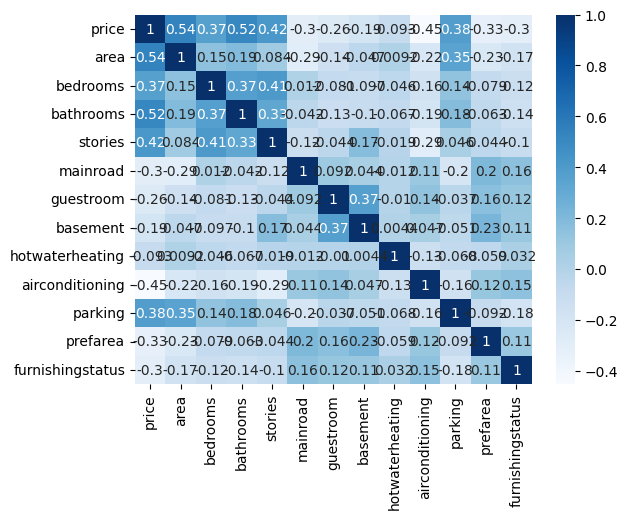

In [133]:
sns.heatmap(core,annot=True,cmap='Blues')
plt.show()

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'mainroad'}>,
        <Axes: title={'center': 'guestroom'}>,
        <Axes: title={'center': 'basement'}>],
       [<Axes: title={'center': 'hotwaterheating'}>,
        <Axes: title={'center': 'airconditioning'}>,
        <Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'prefarea'}>],
       [<Axes: title={'center': 'furnishingstatus'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

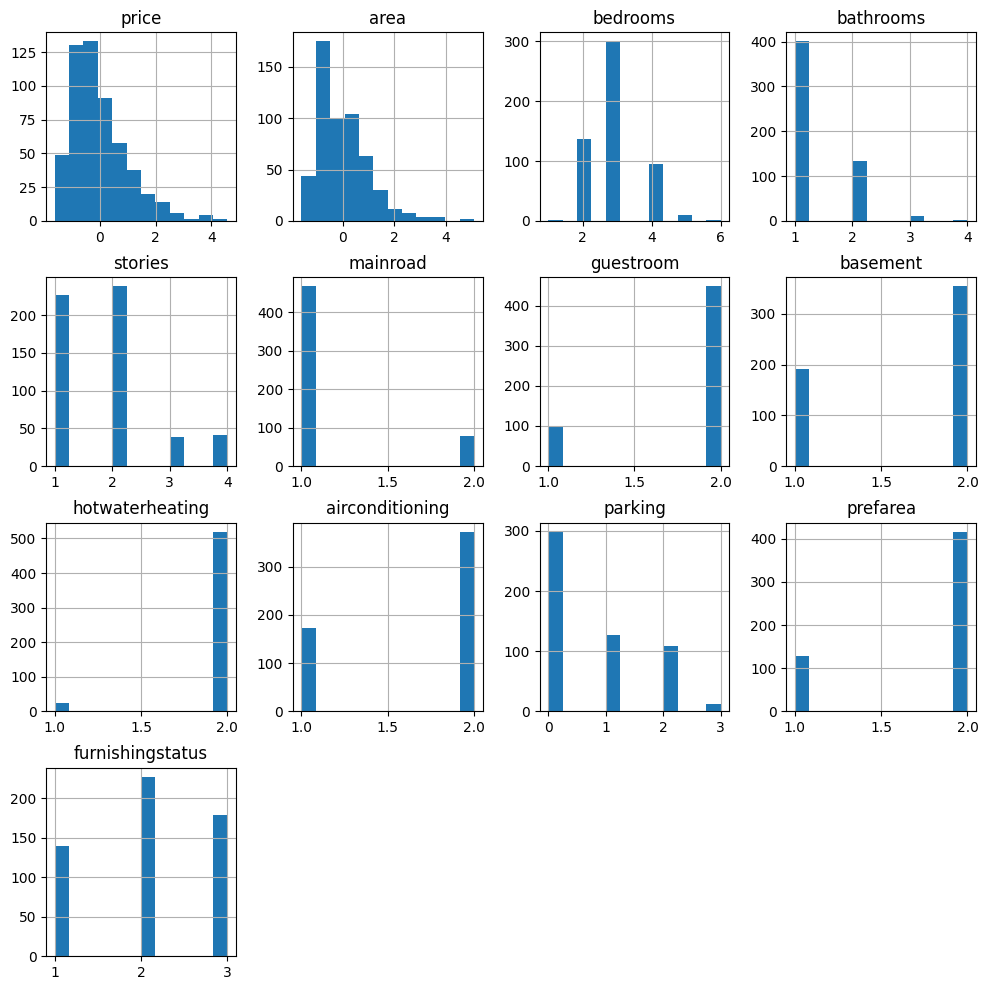

In [134]:
df.hist(figsize=(12,12),bins=12)


In [135]:
x = df.drop('price',axis =1)
y = df['price']

In [136]:
x_train,y_train, x_test, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [137]:
len(x_train)

436

In [138]:
len(x_test)

436

In [139]:
len(y_train)

109

In [143]:
len(y_test)

109

In [144]:
model = LinearRegression()

In [145]:
model

LinearRegression()

In [147]:
model.fit(x_train,x_test)

LinearRegression()

In [148]:
y_predict = model.predict(y_train)

In [149]:
y_predict

array([ 2.33829466e-01,  1.33260788e+00, -9.11799559e-01, -1.10844471e-01,
       -7.67260356e-01, -6.44102245e-01,  4.70234029e-01,  8.81484614e-01,
       -1.07608130e+00, -1.12257985e+00,  2.57067072e+00, -1.03776639e+00,
       -8.40704125e-01, -7.56915489e-01, -5.63406050e-01,  2.85948771e-01,
       -9.51884867e-01,  2.35832585e-02, -2.05326085e-01, -6.64430829e-01,
        5.50927209e-01,  5.74334213e-01, -1.07373582e+00, -2.21493441e-03,
        2.34398855e-01,  1.47095836e+00, -8.09134204e-01,  2.51206442e-01,
        1.82573567e+00, -7.13087608e-01,  8.97507279e-01, -7.60264951e-01,
        1.05719022e+00, -3.27385312e-01, -6.30150579e-01,  5.46574731e-01,
        8.78104452e-04, -2.00696005e-01, -8.28947011e-01, -6.87810019e-02,
       -1.30874930e-01, -6.55766156e-01,  1.32251120e+00, -3.98782284e-01,
       -5.69774427e-01, -2.50357991e-01,  1.03721897e+00, -4.13792090e-01,
       -5.18292055e-01, -7.03639762e-01,  1.35240368e+00, -1.03483724e+00,
       -2.07645079e-01, -

In [152]:
score = r2_score(y_test,y_predict)*100

In [153]:
score

64.94754192267796